# **NumPy Project: CPI Inflation Modelling**

# Introduction

For my NumPy project, I aimed to develop a project that reflects my current interests in mathematics, model training, and financial data. Central to these interests is my consideration of applying data science withing the finance industry. In this project, I am working with a dataset that contains inflation rates of various goods from the 1900s until 2015. 

The primary question I seek to answer is: **How do inflation trends for essential commodities (meat, fuel, and grain) compare to luxury items (metals and plant extracts) from 1900 to 1920?** 

To address this question, I followed these steps:

1. **Modeling the inflation rates** of essential commodities and luxury item

2. **Fitting exponential curves** to reflect the behavior of the inflation rates for each item

3. **Comparing the growth rates** for each item

Through this project, I will demonstrate my ability to use libraries such as **NumPy**, **Pandas**, **Matplotlib**, and **Scipy.optimize** to manipulate datasets and model data effectively

### Step 1: Model Inflation Rates of Essential Commodities and Luxury Items

First, I load in the necessary libraries for this project:

**NumPy**: to manipulate numerical arrays and perform mathematics **( Step 1 )**

**Matplotlib**: to visualize data **( Step 1 )**

**Pandas**: to manipulate data **( Step 2 )**

**Scipy.optimze**: to make exponential fit **( Step 2)**

In [210]:
# import packages
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.optimize import curve_fit

Secondly, I separated the headers from the numerical data. The headers are stored in their own array, as well as the numerical data. I used the headers to identify what is an essential commodity or a luxury item. I also used the headers in my visualization too. An important thing to note in my numerical data is that it also contains a column of years. With that, I extracted the year column and pull all the rows from the column, which contains all the years in the dataset. 

In [212]:
# separate headers from numerical data
headers = np.genfromtxt('consumer_price_index.csv', delimiter=',', dtype='str')[0, :]
data = np.genfromtxt('consumer_price_index.csv', delimiter=',', skip_header=1)

# pull years from 'Year' column
years = data[:, 0]

In this project, meat, fuel, and grain are essential commodities. For the luxury items, they are metal and plant extract. To specify what goes in these categories ( essential or luxury ), I listed the headers, and assign them to the array they correspond with. The headers **.tolist()** method converts the headers into an array while the **.index()** looks for the column name and returns the index of the column name.

In [214]:
# specify essentails and luxuries
essentials = [headers.tolist().index('Data.Meat.Average'), headers.tolist().index('Data.Fuel.Average'), headers.tolist().index('Data.Grain.Average')]
luxury = [headers.tolist().index('Data.Metal.Average'), headers.tolist().index('Data.Plant extract.Average')]

After I pulled in all the data and separated them into their own arrays, I filtered the data that I need to make my model. In this model, I only needed data about essential commodies and luxury items from 1900 to 1920. To do this, I first filtered the entire data in the range of 1900 to 1920 using a boolean mask. According to Medium.com, "Boolean masking means we use boolean expression 
(based on one or more conditions) to extract or modify part of elements in an array". I used masking because I only wanted data with the condition that it falls in between 1900 to 1920.

After I made the mask, I put it as an index for years, to extract the years that meet the criteria, and set them in them in their own array. I also applied this with data, so I only extracted the data from the rows corresponding to the years in the range. In the end, I got a 2D array of the filtered years and the filtered data. Just to verify that I filtered the data correctly, I printed out the filtered years, and then the filtered data from *Data.Meat.Average* and *Data.Fuel.Average*, and their corresponding years. Gladly, the filters worked and I was able to move on to visualize the filtered data. 

In [217]:
# boolean mask to filter data for years 1900 - 1920
mask = (years>= 1900) & (years<= 1920)

# extract the years that meet the criteria and puts them in an array
filteredYears=years[mask]

# extract the data from rows with corresponding to years in the range of 1900 - 1920
# 2D array containing the data for years 2000 to 2015
filteredData=data[mask,:]

# verify data extraction
print(filteredYears)
print(filteredData[:, essentials[0]])  # Meat data
print(filteredData[:, essentials[1]])  # Fuel data

[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
[100.         101.51568836 107.51251091  99.38399861  94.86734674
  96.42255009 101.27607326  95.02373075  94.93483086 103.57750275
 110.28534598  95.45257637 100.77491938 103.55437838 102.89899761
 131.44926637 139.2064295  143.88873409 149.94411056 149.04960427
  92.11287597]
[100.          89.0435257   90.90665719 100.85246772  95.88009689
  87.24991242  90.02363502  91.92248159  94.99786474  90.98361758
  82.93072016  82.73938507  89.04600281 103.3369876   93.43294012
  85.53137115 112.11548115 135.8284396  136.98789047 121.02658524
 150.71304879]


Finally, I plot the essential commodities and the luxury items to show the inflation trends of each item from 1900 to 1920. For each item in the essentials array and luxury array, I plotted their data in the tine frame, and put their label in the legend. For the luxury items, I chanegd the color of metal and plant extract's trednline like so each type has their own distinct color. I used Chat GPT to help me change the colors for the luxury item's plot. 

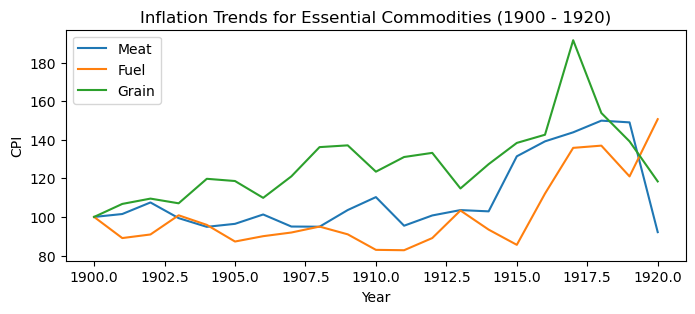

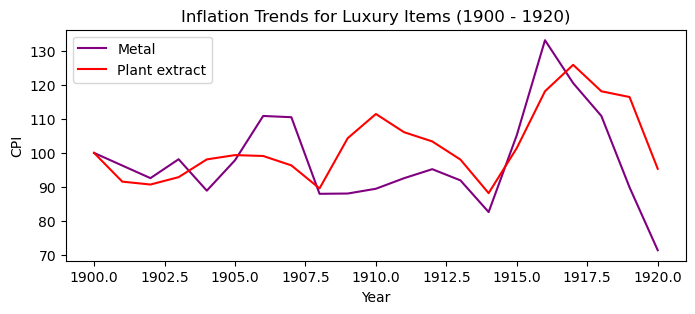

In [219]:
# ---------------------- plot essential commodities

# plot the figure
plt.figure(figsize=(8, 3))

# for loop to plot each element in essentials [fuel,meat,grain]
# x axis values are filteredYears
# y axis values are filteredData at the "i"th index 
# the label is also plotted for each header in essentials
# split('.')[1] splits the string at the dot and only uses the second part of the string; the second word in the header
for i in essentials:
    plt.plot(filteredYears, filteredData[:, i], label=headers[i].split('.')[1])

# plot x label
plt.xlabel('Year')

# plot y label
plt.ylabel('CPI')

# plot title
plt.title('Inflation Trends for Essential Commodities (1900 - 1920)')

# plot legend
plt.legend()

# show legend
plt.show()


# ---------------------- plot luxury items
plt.figure(figsize=(8, 3))

# list of colors for trendlines for luxury items
colors = ['purple', 'red'] 

# itrerate through luxury items and assign color from the colors list
# enumerate assigns a uniqive index for each luxury item to access their corresponding color in the color list
for idx, i in enumerate (luxury):
    plt.plot(filteredYears, filteredData[:, i], label=headers[i].split('.')[1],color=colors[idx % len(colors)])
    
# plot x label
plt.xlabel('Year')

# plot y label
plt.ylabel('CPI')

# plot title
plt.title('Inflation Trends for Luxury Items (1900 - 1920)')

# plot legend
plt.legend()

# show the plot
plt.show()

For Step 1, I made a basic model that shows the trends of inflation rates from 1900 to 1920. In this graph, I can see the behavior of the trendlines which will help me with Step 2, which is fitting exponential curves to reflect the behavior of the inflation rates of each commodity and item. 

### Step 2: Fit Exponential Curves

For Step 2, I introduced **Pandas** and **curve_fit** from **Scipy.optimize** that helped manipulate the data and make the exponential fit for the data. I imported these packages in Step 1, so I can move on with the process with to making an exponential model for the essentail commodities and luxury items. For Step 2, I  made an exponential fit that could fit with each product in essentail modities and luxury items. Here, I demonstrated how I made the exponential fit for the meat data.

#### **Exponential Fit for Average Meat Data**

First, I extracted the data and years for the Data.Average.Meat column. To do this, I pulled all the data from the column. Then, I set a number of points that matches how many numbers are the in meat data, which we call 'cpi'. Then, I made an array of years from 1900 ( which is 0 for the consideration of optimizing values) and N ( the final year in the array ), in intervals of 1. 

In [225]:
# extract the fifth column from the data
meat_cpi = data[:, 4]

# N is the number of points in the data set
N = meat_cpi.shape[0]

# make array of years from to to N
year = np.arange(0, N, 1)

Then, I filtered the data so I only got the years in the range of 1900 to 1920, and I got the number of points that are equal to the distance between the lowest year (1900, which is 0) and highest year (1920, which is 20). Then, I applied the filter for the years and CPI values to match up to each other. I also used the shape() method in c_cut to check how many CPI values I had, which should be 20. Fortunately, that was the case and proceeded to make the exponential function. 

In [227]:
# range of years from 1900 to 1920
ilo, ihi = 0, 20

# the number of points we should have is from subtracting the highest year (20 means 1920) with the lowest year ( 0 means 1900 ) 
Nnew = ihi - ilo

# this is a filter for the years we want and the CPI values 
y_cut, c_cut = year[:Nnew], meat_cpi[ilo:ihi]

# check how many CPI values we have 
c_cut.shape

(20,)

The exponential method that I used to make the model is a very common exponential function. This method calculuates the exponential growth of the parameters that are inputted into the function. For this exponential model, two parameters were sufficient to make an exponential curve that fits the data well.

Since *b* and *c* are the parameters of the function, and they will determine how the model looks in the end, I needed to make initial guesses for how they would look with the model. By this, I am also defined *b* and *c*. 

In [230]:
# exponential function
def myExp(x, b, c):
    return np.exp(b*x) + c
    
# make the initial guesses for the parameters
b, c = (0.04, c_cut[0])

From here, I calculated the optimized paramaters by inputting the exponential function, the filtered years, the filtered CPI values, and the parameters b and c, into the curve_fit function from scipy.optimize, which created a curve fit for the data points. Next, I set b and c as the results from the optimized values. Then, I made my curve fit with the exponential function that takes in the y_cut, b, anc c. Finally, I plotted a scatter plot for the data points, and a regular plot to plot the exponential curve for the data. 

Growth rate: 21.8%


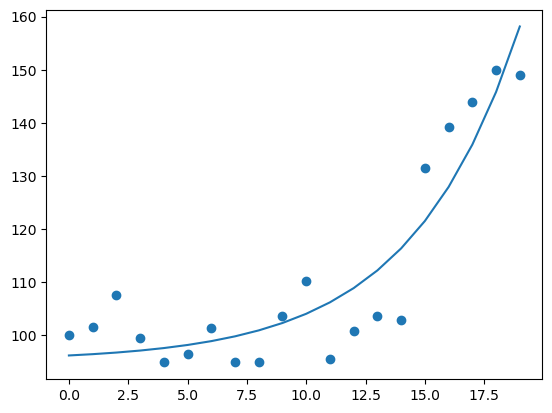

In [232]:
# optimize parameters with curve_fit
params, _ = curve_fit(myExp, y_cut, c_cut, p0=[b, c])
b, c = params[0], params[1]

# make the curve fit for the data points
c_fit = myExp(y_cut, b, c)

# plot data points as scatter plot and curve as regular plot
plt.scatter(y_cut, c_cut)
plt.plot(y_cut, c_fit)

# print the growth rate of the exponential curve
print(f'Growth rate: {b:.1%}')

This is the exponential curve fit for the average meat data from 1900 to 1920. From that period, inflation has grown at a rate of 21.8%, which is a high rate. Though this model is not perfect, it passes through a majority of points and tries to minimize total error. Now that this is done for the average meat data, I will used the same code to make exponential fits for the average fuel data, average grain data, average metal data, and average plant extract data. 

Growth rate: 19.9%


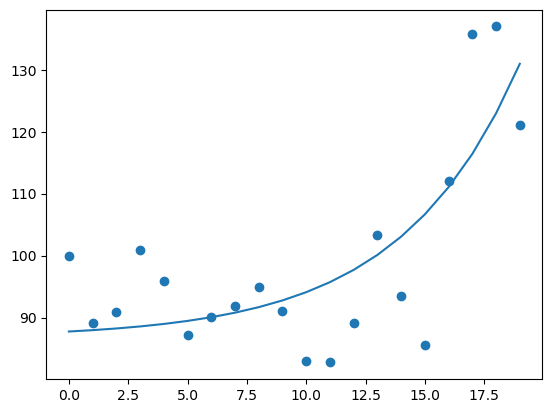

In [234]:
# extract the nineth column from the data
fuel_cpi = data[:, 8]

# N is the number of points in the data set
N = fuel_cpi.shape[0]

# make array of years from to to N
year = np.arange(0, N, 1)

# range of years from 1900 to 1920
ilo, ihi = 0, 20

# the number of points we should have is from subtracting the highest year (20 means 1920) with the lowest year ( 0 means 1900 ) 
Nnew = ihi - ilo

# this is a filter for the years we want and the CPI values 
y_cut, c_cut = year[:Nnew], fuel_cpi[ilo:ihi]

# check how many CPI values we have 
c_cut.shape

# exponential function
def myExp(x, b, c):
    return np.exp(b*x) + c
    
# make the initial guesses for the parameters
b, c = (0.04, c_cut[0])

# optimize parameters with curve_fit
params, _ = curve_fit(myExp, y_cut, c_cut, p0=[b, c])
b, c = params[0], params[1]

# make the curve fit for the data points
c_fit = myExp(y_cut, b, c)

# plot data points as scatter plot and curve as regular plot
plt.scatter(y_cut, c_cut)
plt.plot(y_cut, c_fit)

# print the growth rate of the exponential curve
print(f'Growth rate: {b:.1%}')

Growth rate: 20.5%


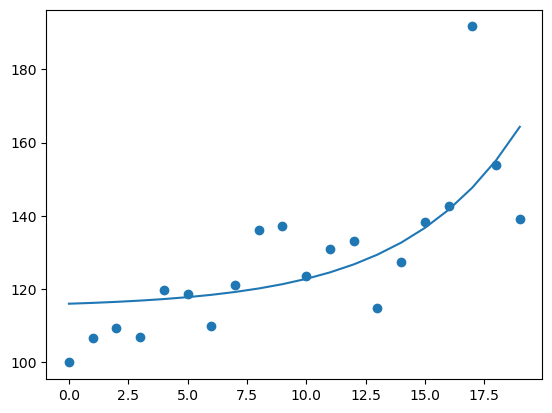

In [235]:
# extract the nineth column from the data
grain_cpi = data[:, 13]

# N is the number of points in the data set
N = grain_cpi.shape[0]

# make array of years from to to N
year = np.arange(0, N, 1)

# range of years from 1900 to 1920
ilo, ihi = 0, 20

# the number of points we should have is from subtracting the highest year (20 means 1920) with the lowest year ( 0 means 1900 ) 
Nnew = ihi - ilo

# this is a filter for the years we want and the CPI values 
y_cut, c_cut = year[:Nnew], grain_cpi[ilo:ihi]

# check how many CPI values we have 
c_cut.shape

# exponential function
def myExp(x, b, c):
    return np.exp(b*x) + c
    
# make the initial guesses for the parameters
b, c = (0.04, c_cut[0])

# optimize parameters with curve_fit
params, _ = curve_fit(myExp, y_cut, c_cut, p0=[b, c])
b, c = params[0], params[1]

# make the curve fit for the data points
c_fit = myExp(y_cut, b, c)

# plot data points as scatter plot and curve as regular plot
plt.scatter(y_cut, c_cut)
plt.plot(y_cut, c_fit)

# print the growth rate of the exponential curve
print(f'Growth rate: {b:.1%}')

<span style="color:red"><strong>Note: This is not a very good fit. The fit does not pass through points and the data is everywhere. There's not much of a way to fit a good exponential curve to this data.</strong></span>

Growth rate: 14.2%


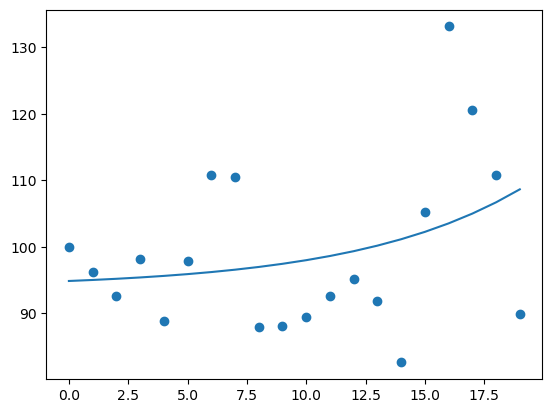

In [237]:
# extract the twenty-eighth column from the data
metal_cpi = data[:, 27]

# N is the number of points in the data set
N = metal_cpi.shape[0]

# make array of years from to to N
year = np.arange(0, N, 1)

# range of years from 1900 to 1920
ilo, ihi = 0, 20

# the number of points we should have is from subtracting the highest year (20 means 1920) with the lowest year ( 0 means 1900 ) 
Nnew = ihi - ilo

# this is a filter for the years we want and the CPI values 
y_cut, c_cut = year[:Nnew], metal_cpi[ilo:ihi]

# check how many CPI values we have 
c_cut.shape

# exponential function
def myExp(x, b, c):
    return np.exp(b*x) + c
    
# make the initial guesses for the parameters
b, c = (0.04, c_cut[0])

# optimize parameters with curve_fit
params, _ = curve_fit(myExp, y_cut, c_cut, p0=[b, c])
b, c = params[0], params[1]

# make the curve fit for the data points
c_fit = myExp(y_cut, b, c)

# plot data points as scatter plot and curve as regular plot
plt.scatter(y_cut, c_cut)
plt.plot(y_cut, c_fit)

# print the growth rate of the exponential curve
print(f'Growth rate: {b:.1%}')

<span style="color:red"><strong>Note: This is not a good fit. There is not consistent pattern or growth in the data points and therefore, the curve cannot fit the points.</strong></span>

Growth rate: 17.5%


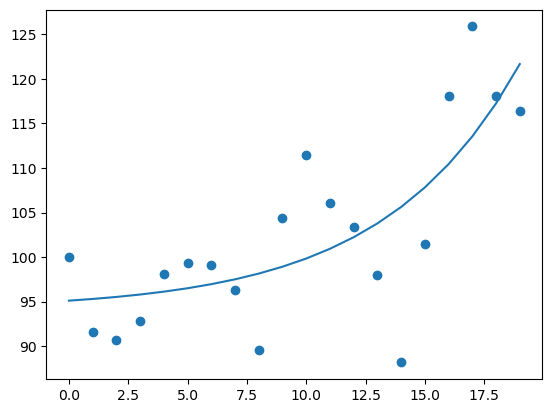

In [239]:
# extract the thirty-eighth column from the data
plant_cpi = data[:, 37]

# N is the number of points in the data set
N = plant_cpi.shape[0]

# make array of years from to to N
year = np.arange(0, N, 1)

# range of years from 1900 to 1920
ilo, ihi = 0, 20

# the number of points we should have is from subtracting the highest year (20 means 1920) with the lowest year ( 0 means 1900 ) 
Nnew = ihi - ilo

# this is a filter for the years we want and the CPI values 
y_cut, c_cut = year[:Nnew], plant_cpi[ilo:ihi]

# check how many CPI values we have 
c_cut.shape

# exponential function
def myExp(x, b, c):
    return np.exp(b*x) + c
    
# make the initial guesses for the parameters
b, c = (0.04, c_cut[0])

# optimize parameters with curve_fit
params, _ = curve_fit(myExp, y_cut, c_cut, p0=[b, c])
b, c = params[0], params[1]

# make the curve fit for the data points
c_fit = myExp(y_cut, b, c)

# plot data points as scatter plot and curve as regular plot
plt.scatter(y_cut, c_cut)
plt.plot(y_cut, c_fit)

# print the growth rate of the exponential curve
print(f'Growth rate: {b:.1%}')

<span style="color:red"><strong>Note: This is not a good fit either. The points fluctuate up and down so there is no way to fit an exponential curve in which the data changes rapidly.</strong></span>

### **Exponential Fit and Plot Method**

To make an expoential model for all products, I needed to apply the same code for all of them. However, copy and pasting the code is inefficient. So, I developed a method that would make an exponential fit for all these columns and plot their graphs too. I called this method **exp_fit_and_plot()**

For this new method, I implemented the exponential function and used what I already set for *b* and *c*. In this method, *b* and *c* are the default initial guesses for the curve.

**exp_fit_and_plot()** takes three parameters, which are the CPI data, the CPI header, and the year range:

**def exp_fit_and_plot(cpi_data, cpi_header, year_range=(0, 20)):**

From here, all I did was copy the code for the exponential model above. For this method, I made a few adjustments to the code. First I took out, **c_cut.shape**. **c_cut.shape** is helpful to see how many points are in the column after I filter it for yeats, but not necessary for plotting the model. I also used parameter, *cpi_data* to represent CPI data in general. If I pass *meat_data* in the first parameter of the method, *cpi_data* will be the CPI data for meat. 

Another adjustment that I made for this method is that I used the header of each column for the header for each plot. To do this, I made a variable named *cpi_type* and extracted the second string of the header. This is essentially what I did in Step 1, when I made labels for the legend. In this case, I used the second word of each header, for title of each graph, to specify which product I am modelling. 

Finally, I added a label for the x axis, the y axis, and a title to make my graph more informative.

In [249]:
def exp_fit_and_plot(cpi_data, cpi_header, year_range=(0, 20)):
    N = cpi_data.shape[0]
    year = np.arange(0, N, 1)
    ilo, ihi = 0, 20
    Nnew = ihi - ilo
    y_cut, c_cut = year[:Nnew], cpi_data[ilo:ihi]
    b, c = (0.04, c_cut[0])
    params, _ = curve_fit(myExp, y_cut, c_cut, p0=[b, c])
    b, c = params[0], params[1]
    c_fit = myExp(y_cut, b, c)

    # extract the second word from the header
    cpi_type = cpi_header.split('.')[1]

    # plot data points and curve
    plt.scatter(y_cut, c_cut)
    plt.plot(y_cut, c_fit)

    # plot labels, title, and legend
    plt.xlabel('Year')
    plt.ylabel('CPI')

    # use string formatting to input cpi_type to the header
    plt.title(f'Exponential Fit for {cpi_type} CPI Data (1900 - 1920 )')
    plt.show() 

    # print the growth rate of the exponential curve
    print(f'Growth rate: {b:.1%}')

After I made this, I applied it to the CPI data for meat, fuel , grain , metal, and plant extract .First I  made each product contain an array of the data corresponding to its column. Then, I passed the each product array into the first parameter, and their header as the second parameter. For each header, I input its index that aligns with its cpi data and from the headers array, which is in Step 1. After calling **exp_fit_and_plot()** on these CPI datas, the method made plots for each CPI data. 

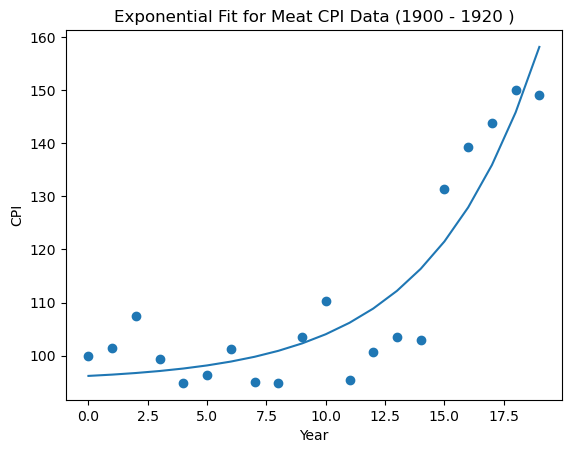

Growth rate: 21.8%


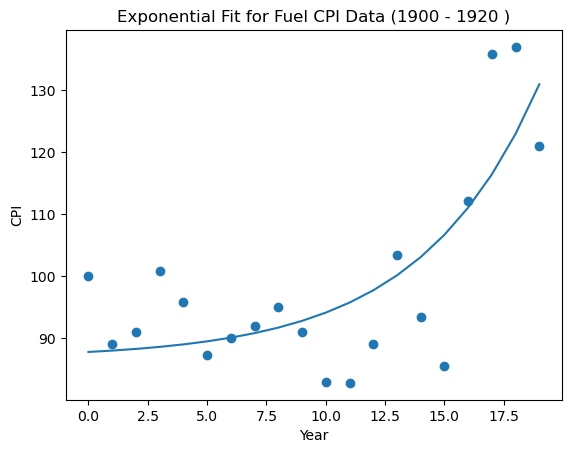

Growth rate: 19.9%


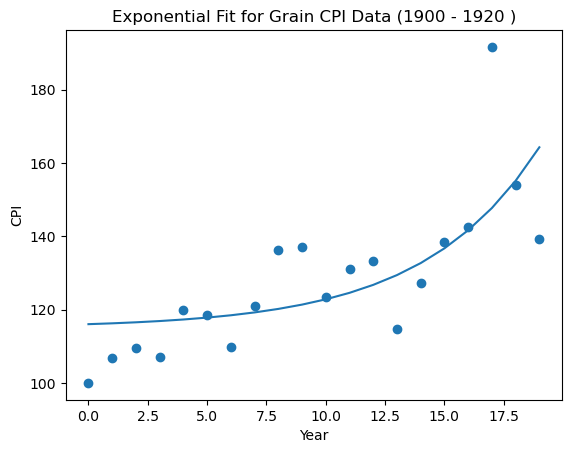

Growth rate: 20.5%


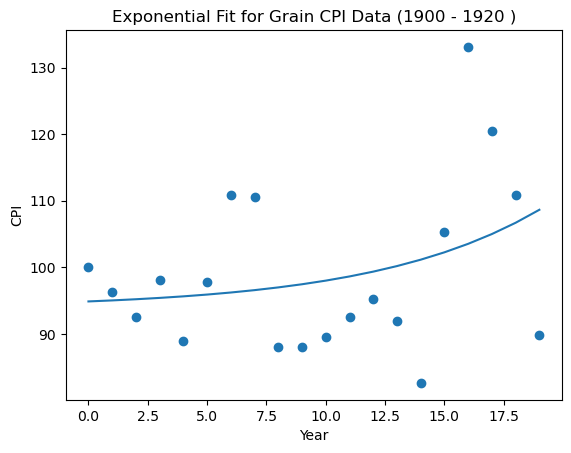

Growth rate: 14.2%


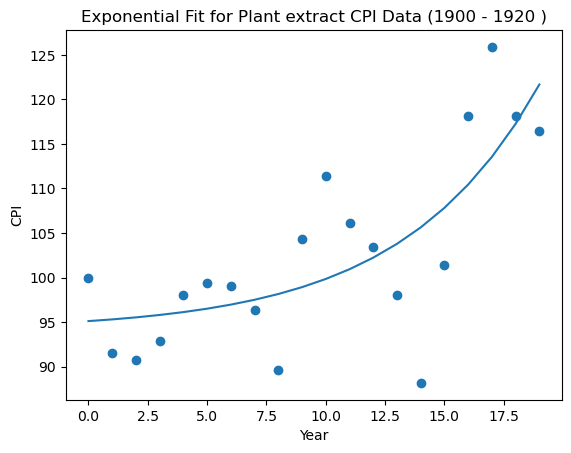

Growth rate: 17.5%


In [251]:
# extract data for correspinding columns from the dataset
meat_cpi = data[:, 4]
fuel_cpi = data[:, 8]
grain_cpi = data[:, 13]
metal_cpi = data[:, 27]
plant_cpi = data[:, 37]

# call the function for all variables
exp_fit_and_plot(meat_cpi, headers[4], year_range=(0, 20))
exp_fit_and_plot(fuel_cpi, headers[5], year_range=(0, 20))
exp_fit_and_plot(grain_cpi, headers[9], year_range=(0, 20))
exp_fit_and_plot(metal_cpi, headers[13], year_range=(0, 20))
exp_fit_and_plot(plant_cpi, headers[28], year_range=(0, 20))

### Step 3: Compare the Growth Rates

Now that I made the exponential fits to to each CPI's data points, I can compare the models and the growth rates for product.

Interestingly, I was able to plot exponential curves for the essential commodity goods and not the luxury items. According the the model that I developed in Step 1, the essential items have similar inflation rates/trends as each other. This must mean that economically, that the global market is the driver of inflation of these items. So, we can conclude that in a market where inflation is rising, if one essential commodity's price increases, so will other essential commodities. With that, it is no suprise that the inflation rates of meat, fuel, and grain have similar inflation growth rates. In the case of supply and demand, as demand increases for these products, the supply decreases, and therefore, the market places high prices on such products. 

Regarding luxury items, it was difficult to plot exponential curves for metal and plant extract. In the model, it seems that the trends for metal and plant extract move in opposite directions. If the inflation rate of metal increases, the inflation rate of plant extract decreases, and vice versa. The period in which the trends align with each other the most, is in the period of 1912 to 1920, which is less than half of the range of years that is in the data. Because of these opposing trendlines, it was difficult for the model to plot the data points in a rational way and plot the curve to fit the data points. Therefore, due metal and plant extract having opposing inflation rates of increase and decrease, I believe that the inflation for these specific luxury items is based on industry supply and demand. Instead of the global market controlling the inflation rates of these products, it is their industries, or even the global industries that drives the inflation of metal and plant extract. 

So, comparing the growth rates of metal and plant extract may not be practical because of their poor exponential fits. However, because the essential commodities have great exponential fits, I can compare the growth rates among them. The essential commodities have close growth rates:

**Meat: 21.8%**

**Fuel: 19.9%**

**Grain: 20.5%**

Therefore, based on the trend model, the exponential model, and my analysis, meat has the highest growth rate among other essential commodities. I am not suprised because after all, people eat meat. With that, meat is very common and everyone consumes it every day. As for grain, its growth rate does not suprise me either. Grain is a complement to meat, which makes sense that it's inflation is similar to the inflation rate of meat. Finally, for fuel, we need fuel to get cars moving everday. Though still a little bit less than meat and grain, it is still high and similar to the other two products.

# Conclusion

To wrap up, my project was a success and I answered my question which dealt with comparing inflation rates for essential commodites and luxury items. I answered my question in three main steps, which were to model the inflation rates for the products, fit exponential curves to find the expoential growth of prodcts' inflation, and compare the growth rates through critical thinking and analysis. Unfortunately, I was not able to make quality exponential models of the inflation rates for luxury items, which were metal and plant extract, due to their incoherent and unstable patterns on the plot. However, I was able to compare and develop exponential models for the essential commodities, meat, fuel , and grain because they have similar trend patterns and growth rates. Comparing these three essential commodities, meat has the highest growth rate among the other products. As I mentioned, meat is very common and almost everyone consumes it every day. With that, it is no suprise that meat takes the lead for growth rate.

To add, the behavior of inflation for essential commodities and luxury items may be subject to market influnce or industry influence. For essential commodities, the global market decides the inflation rate of those products. However, this may not be the case with luxury items, since their trends behave differently from each other. Because the trends of metal and plant extract is not similar, it can be asummed that the matter is of the industry, and not the market itself.

In this project, I demonstrated my interests in finance, mathematics, and machine learning by applying concepts I learned in class, such as basic modelling, discussion and articles about bias-variance tradeoff, polynomials, and exponential fitting. The tools that helped me complete this project are some of the ones I learned in class, which were NumPy and Matplotlib. In addition, to challenge myself and make stretch my project further, I went to implement other packages and methods I am not as familiar with, such as Pandas and Scipy.optimize. Completing this project, I feel that I have a strong understanding of some of these tools, extracting data, manipulating data, and analyzing data. In the future, I hope that I can apply what I have done in this project to upcoming projects, or even add on to this one. Though this was my first data science project, I hope that I use this project in real world scenarios in the Finance or FinTech industry. 